In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20, skipfooter=2)

In [4]:
df.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [5]:
# 1. fix column names
df.rename({
    'OdName':'Country',
    'RegName':'Region',
    'AreaName':'Continent',
    'DevName':'CountryStatus'
}, axis=1, inplace=True)

In [6]:
# 2. fix column dtype
df.columns = df.columns.astype('str') # convert every column to string
print(df.columns)

Index(['Type', 'Coverage', 'Country', 'AREA', 'Continent', 'REG', 'Region',
       'DEV', 'CountryStatus', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')


In [7]:
df.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,CountryStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [8]:
df.describe(include='object')

,Type,Coverage,Country,Continent,Region,CountryStatus
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [9]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']
df.drop(columns = cols_to_drop, inplace=True)

In [10]:
df.head()

,Country,Continent,Region,CountryStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


- *index column is an important column cause it is used in searching and visualization*
- *it is the default value for x-axis of a chart during visualization*
- *index column should contain only unique values*
- *we can make any column into index column using the function `df.set_index(colname)`
- *the index column is accessed via `df.index` statement*

In [11]:
df.index

RangeIndex(start=0, stop=195, step=1)

In [12]:
# 5. make the country column the index of df
df.set_index('Country', inplace=True)

In [13]:
df.head()

,Continent,Region,CountryStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [14]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

### row selection
1. df.loc - use the `index col` value to select rows
2. df.iloc - use the `index` value to select rows

In [15]:
df.iloc[50]  # record of 50th index

Continent                   Europe
Region             Northern Europe
CountryStatus    Developed regions
1980                           272
1981                           293
1982                           299
1983                           106
1984                            93
1985                            73
1986                            93
1987                           109
1988                           129
1989                           129
1990                           118
1991                           111
1992                           158
1993                           186
1994                            93
1995                           111
1996                            70
1997                            83
1998                            63
1999                            81
2000                            93
2001                            81
2002                            70
2003                            89
2004                            89
2005                

In [16]:
df.loc['China']

Continent                      Asia
Region                 Eastern Asia
CountryStatus    Developing regions
1980                           5123
1981                           6682
1982                           3308
1983                           1863
1984                           1527
1985                           1816
1986                           1960
1987                           2643
1988                           2758
1989                           4323
1990                           8076
1991                          14255
1992                          10846
1993                           9817
1994                          13128
1995                          14398
1996                          19415
1997                          20475
1998                          21049
1999                          30069
2000                          35529
2001                          36434
2002                          31961
2003                          36439
2004                        

In [17]:
df.iloc[50, [0,1,2,3,4]]  # from index 50 , get me 0 and 1,2,3,4 columns

Continent                   Europe
Region             Northern Europe
CountryStatus    Developed regions
1980                           272
1981                           293
Name: Denmark, dtype: object

In [18]:
df.iloc[50, 3:] # from index 50, get me 3 and above columns

1980    272
1981    293
1982    299
1983    106
1984     93
1985     73
1986     93
1987    109
1988    129
1989    129
1990    118
1991    111
1992    158
1993    186
1994     93
1995    111
1996     70
1997     83
1998     63
1999     81
2000     93
2001     81
2002     70
2003     89
2004     89
2005     62
2006    101
2007     97
2008    108
2009     81
2010     92
2011     93
2012     94
2013     81
Name: Denmark, dtype: object

In [19]:
# from japan, get me region, continent, countrystatus, 2010, 1990 and 2000
df.loc['Japan',['Region','Continent','2010','1990','2000']]

Region       Eastern Asia
Continent            Asia
2010                 1168
1990                  379
2000                 1010
Name: Japan, dtype: object

In [20]:
years = list(map(str, range(1980,2014))) # list of years
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [21]:
# from japan get me years 1980 - 2013 data
print(df.loc['Japan',years])

1980     701
1981     756
1982     598
1983     309
1984     246
1985     198
1986     248
1987     422
1988     324
1989     494
1990     379
1991     506
1992     605
1993     907
1994     956
1995     826
1996     994
1997     924
1998     897
1999    1083
2000    1010
2001    1092
2002     806
2003     817
2004     973
2005    1067
2006    1212
2007    1250
2008    1284
2009    1194
2010    1168
2011    1265
2012    1214
2013     982
Name: Japan, dtype: object


In [22]:
# 2 records and years data
countrynames = ['Japan','China','Australia']
df.loc[countrynames,years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Japan,701,756,598,309,246,198,248,422,324,494,379,506,605,907,956,826,994,924,897,1083,1010,1092,806,817,973,1067,1212,1250,1284,1194,1168,1265,1214,982
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
Australia,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121


<AxesSubplot:title={'center':'Japan vs China vs Australia Immigration'}, xlabel='Country'>

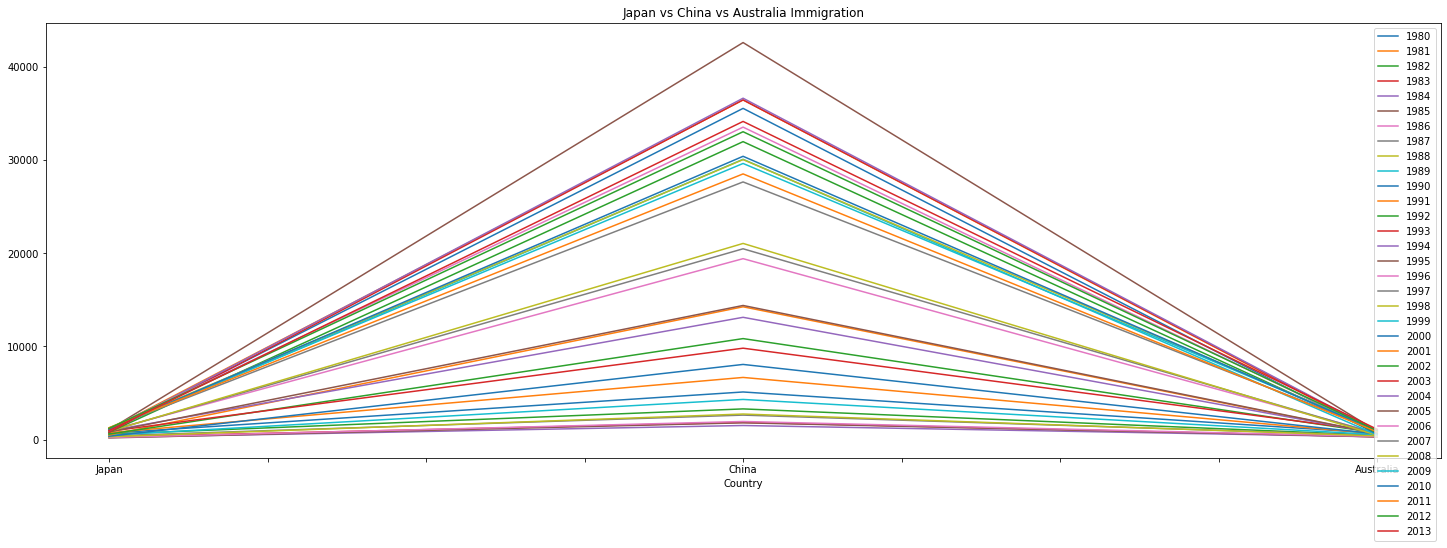

In [23]:
df.loc[countrynames,years].plot(figsize=(25,8),title='Japan vs China vs Australia Immigration')

In [24]:
df.loc[countrynames,years].T

Country,Japan,China,Australia
1980,701,5123,702
1981,756,6682,639
1982,598,3308,484
1983,309,1863,317
1984,246,1527,317
1985,198,1816,319
1986,248,1960,356
1987,422,2643,467
1988,324,2758,410
1989,494,4323,553


<AxesSubplot:title={'center':'Japan vs China vs Australia Immigration'}>

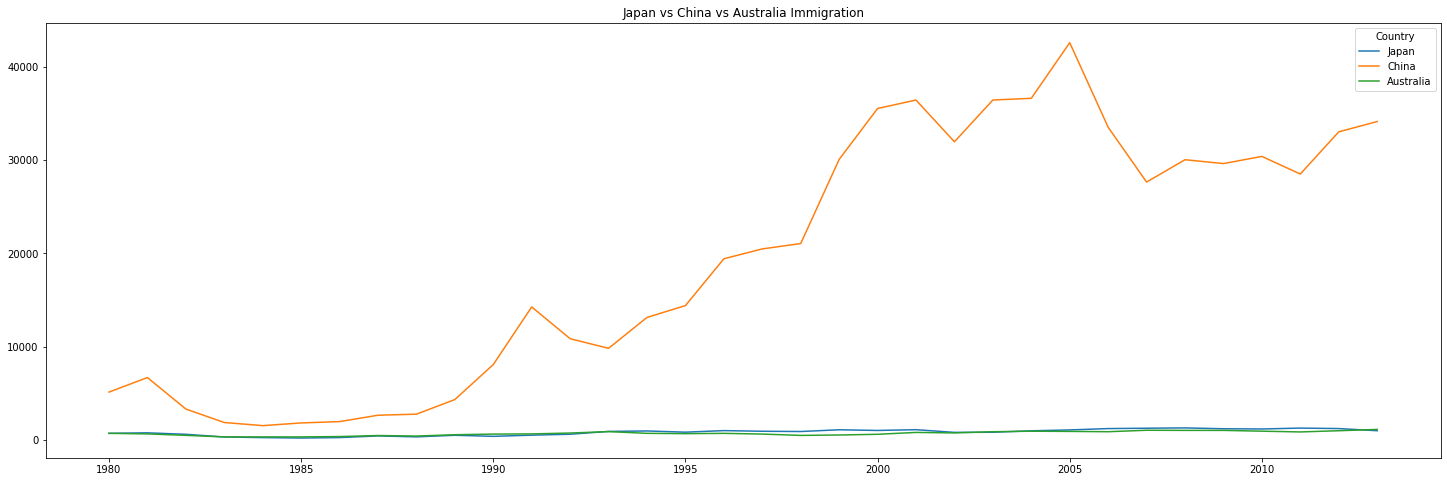

In [25]:
df.loc[countrynames,years].T.plot(figsize=(25,8),title='Japan vs China vs Australia Immigration')

<AxesSubplot:>

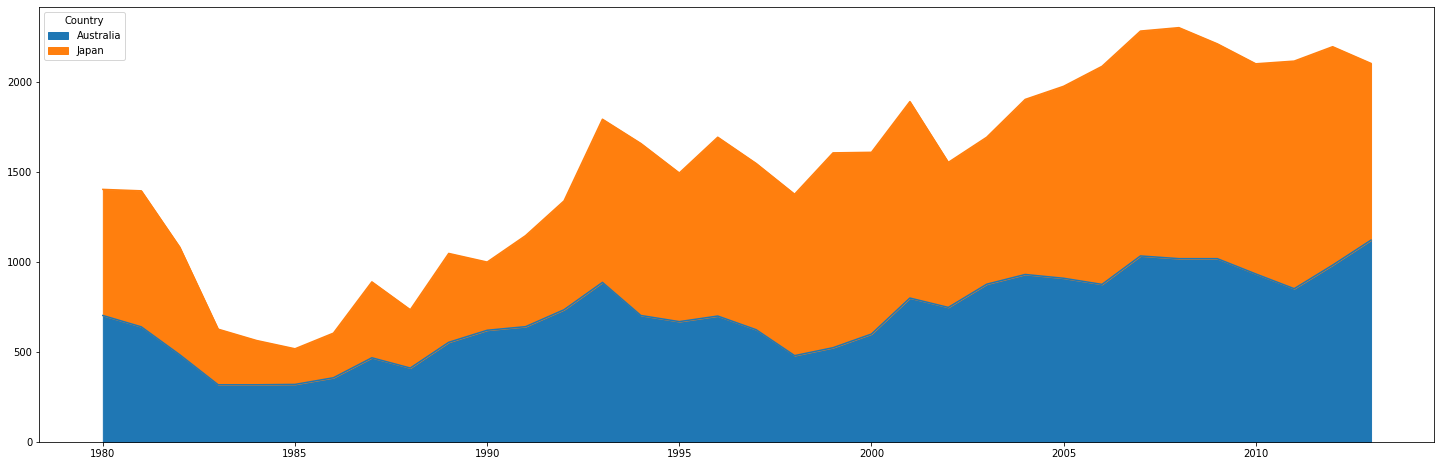

In [26]:
df.loc[['Australia','Japan'],years].T.plot(kind='area',figsize=(25,8))

<AxesSubplot:>

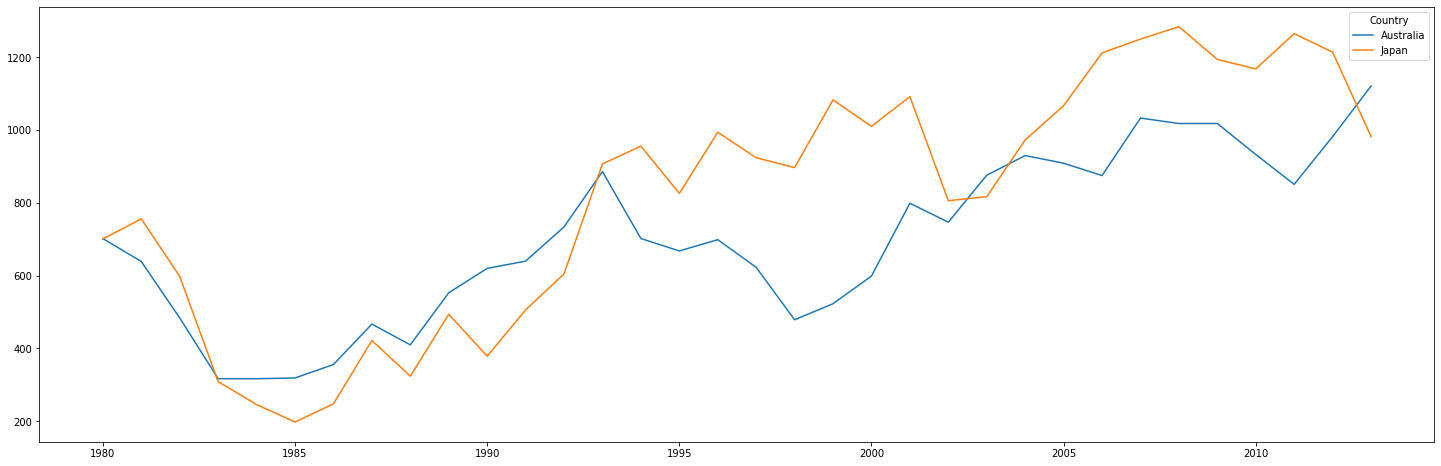

In [27]:
df.loc[['Australia','Japan'],years].T.plot(figsize=(25,8))

<AxesSubplot:>

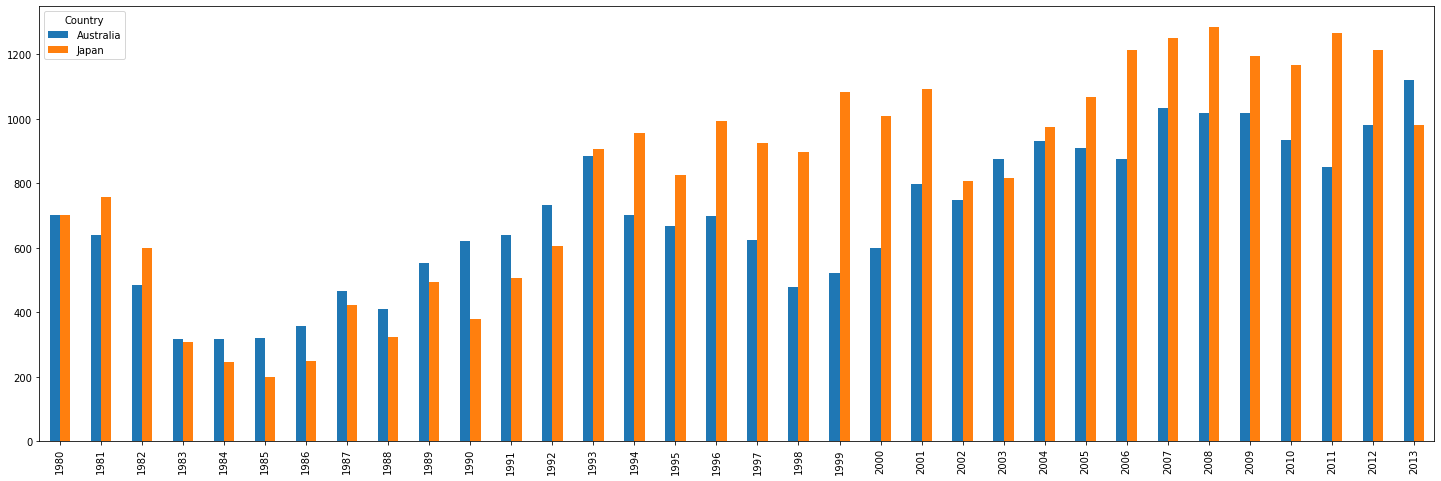

In [28]:
df.loc[['Australia','Japan'],years].T.plot(kind='bar',figsize=(25,8))

<AxesSubplot:ylabel='Frequency'>

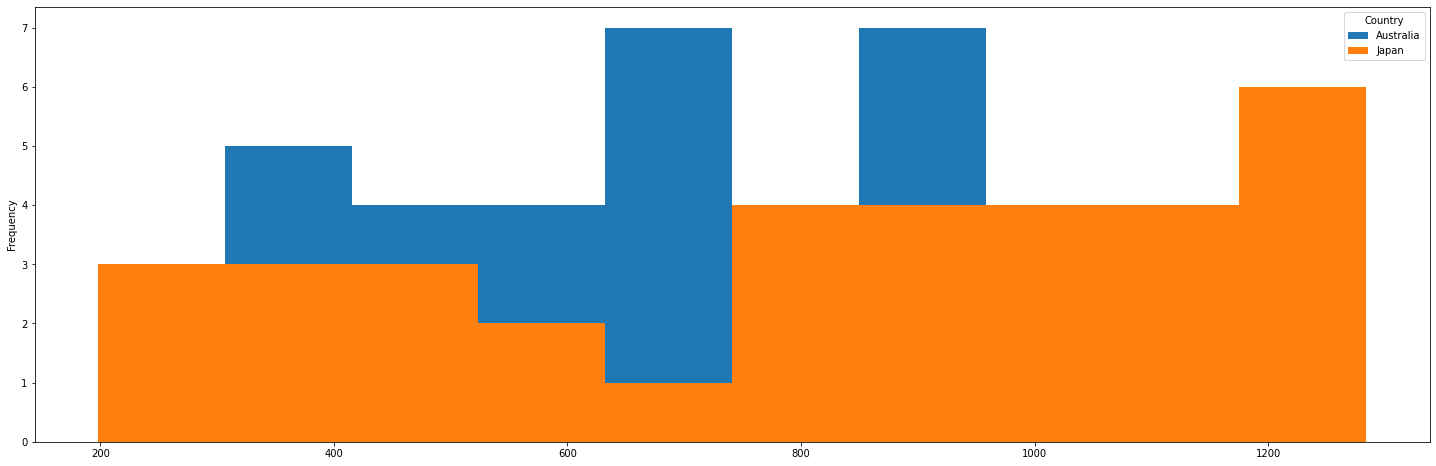

In [29]:
df.loc[['Australia','Japan'],years].T.plot(kind='hist',figsize=(25,8))

<AxesSubplot:>

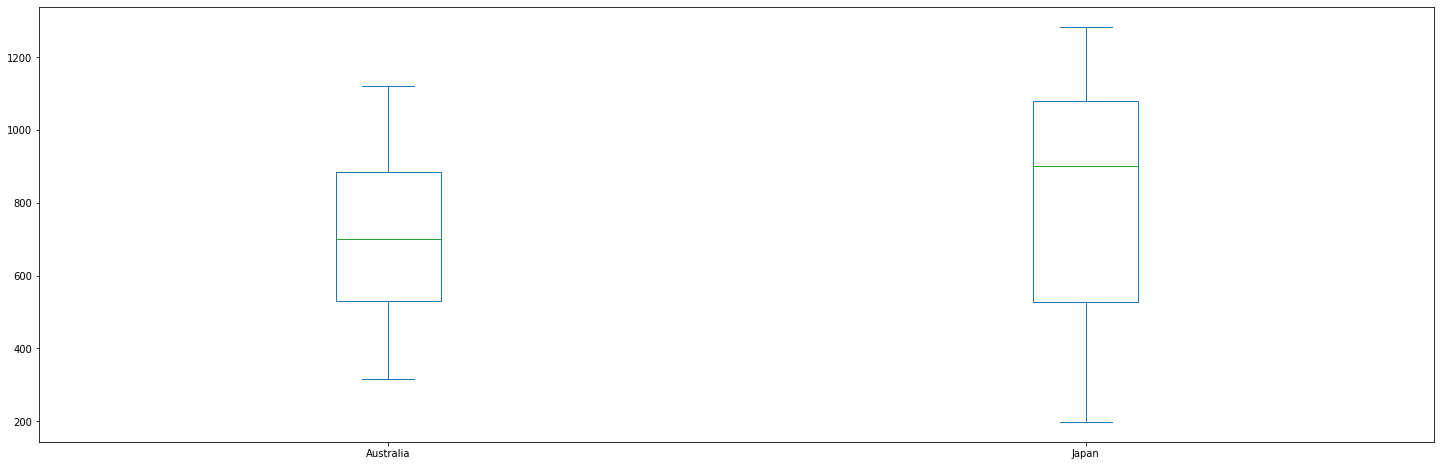

In [30]:
df.loc[['Australia','Japan'],years].T.plot(kind='box',figsize=(25,8))

<AxesSubplot:ylabel='Density'>

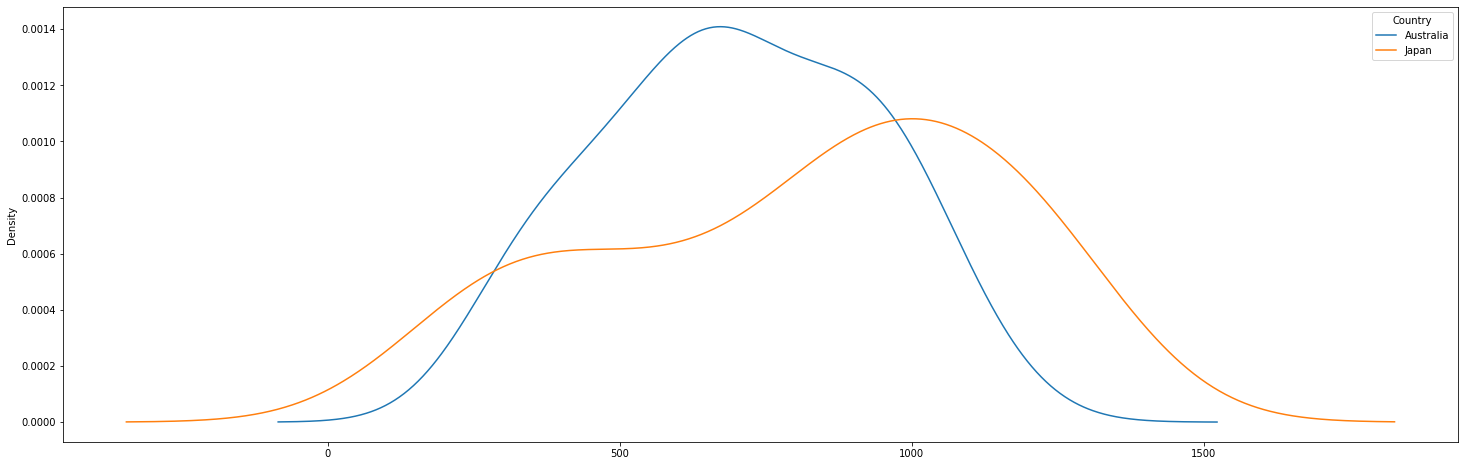

In [31]:
df.loc[['Australia','Japan'],years].T.plot(kind='kde',figsize=(25,8))

array([[<AxesSubplot:title={'center':'India'}>,
        <AxesSubplot:title={'center':'China'}>]], dtype=object)

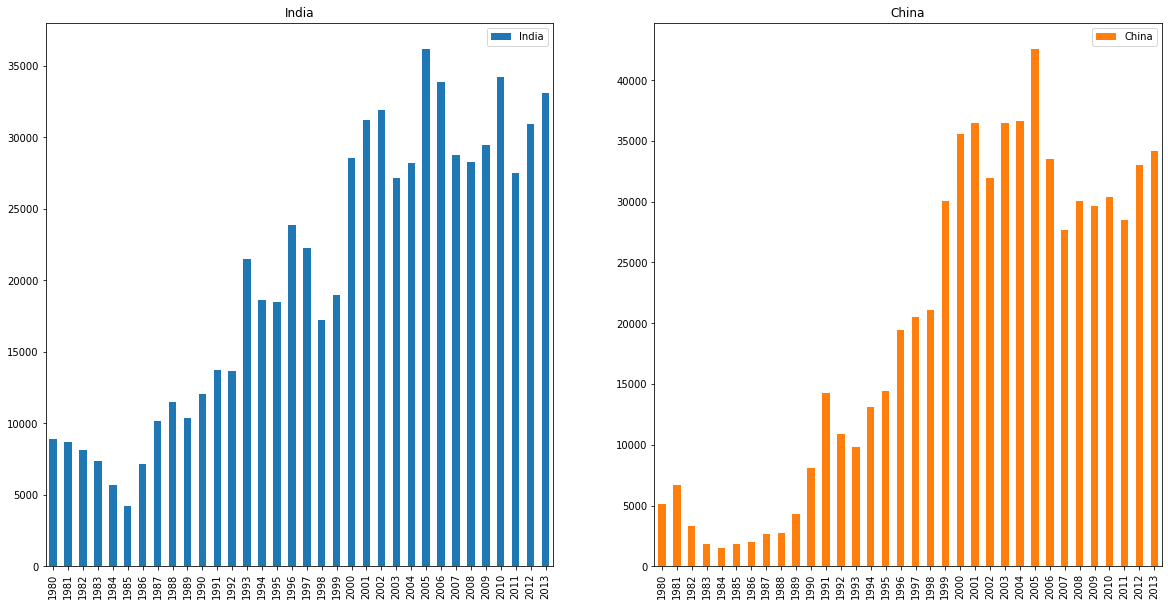

In [32]:
df.loc[['India','China'], years].T.plot(kind='bar',figsize=(20,10),subplots=True, layout=(1,2))

array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

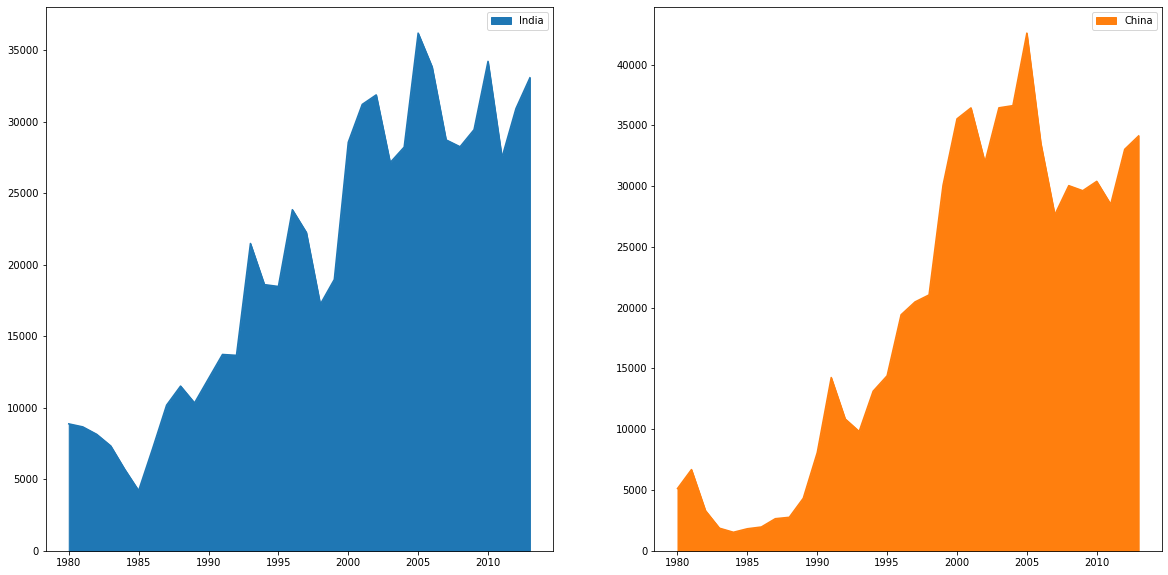

In [33]:
df.loc[['India','China'], years].T.plot(kind='area',figsize=(20,10),subplots=True, layout=(1,2))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

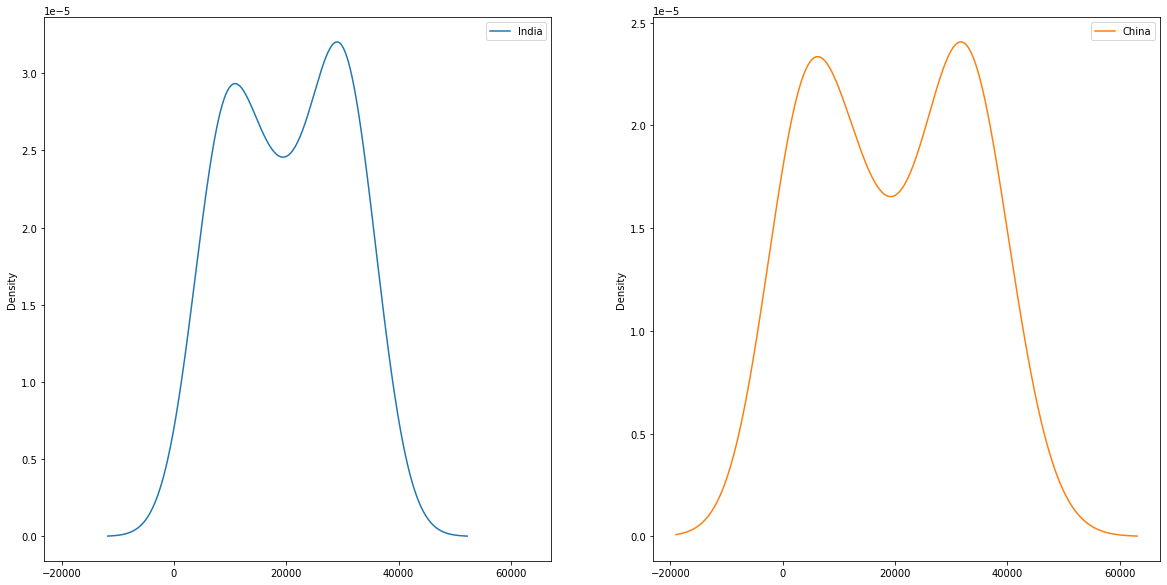

In [34]:
df.loc[['India','China'], years].T.plot(kind='kde',figsize=(20,10),subplots=True, layout=(1,2))

India       AxesSubplot(0.125,0.125;0.352273x0.755)
China    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

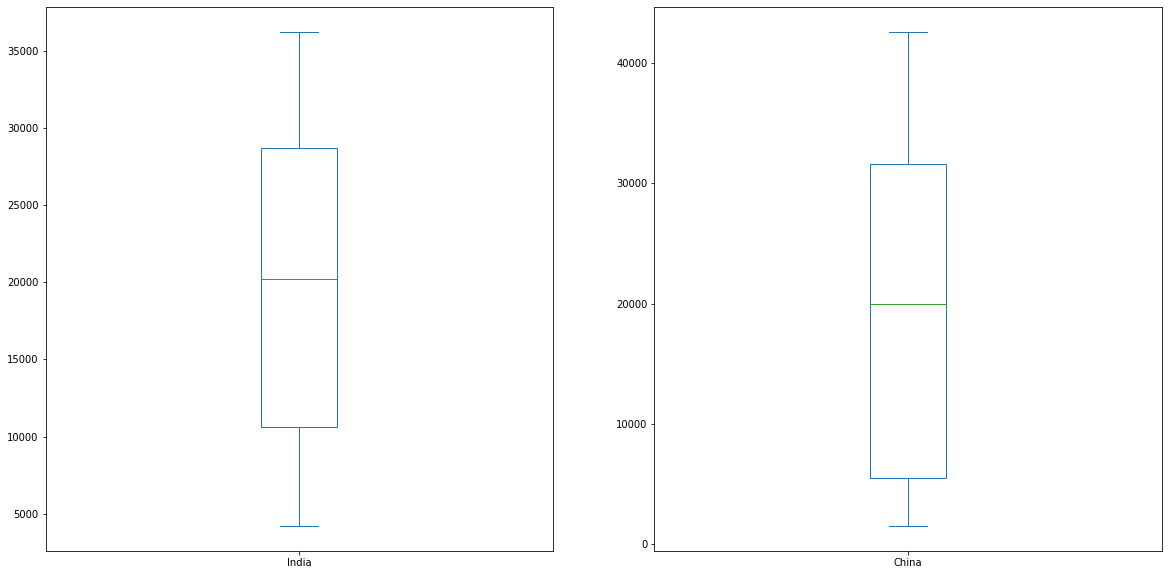

In [35]:
df.loc[['India','China'], years].T.plot(kind='box',figsize=(20,10),subplots=True, layout=(1,2))

array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

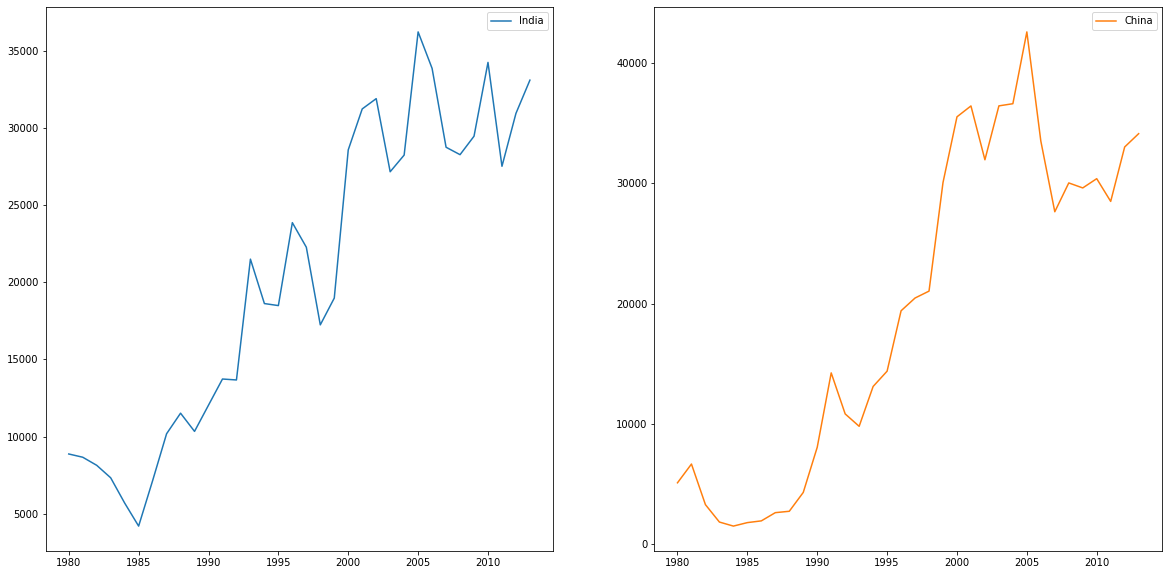

In [36]:
df.loc[['India','China'], years].T.plot(kind='line',figsize=(20,10),subplots=True, layout=(1,2))

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

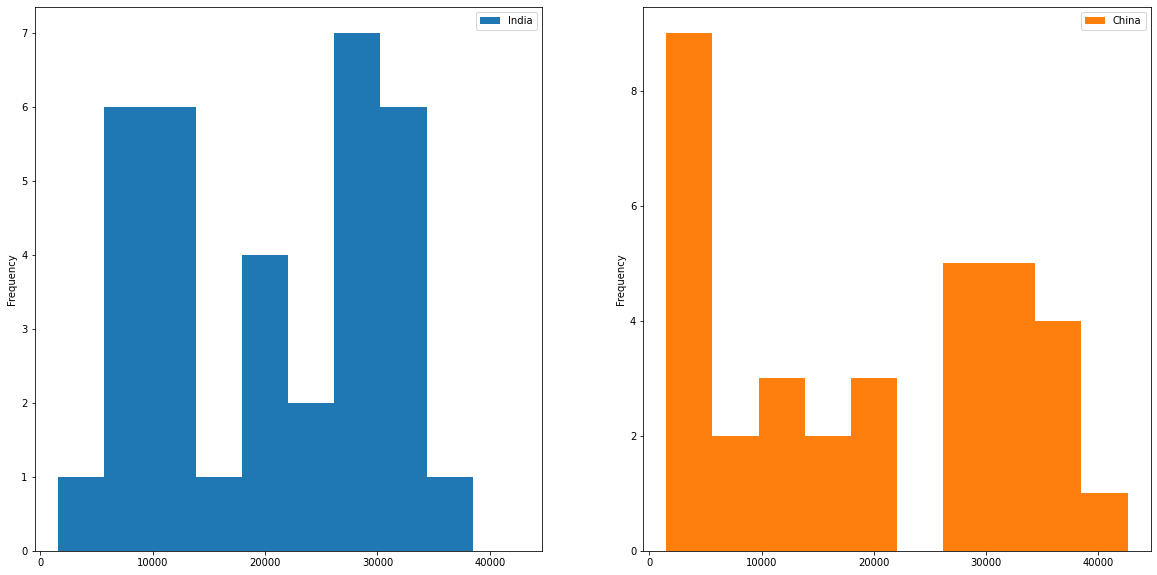

In [37]:
df.loc[['India','China'], years].T.plot(kind='hist',figsize=(20,10),subplots=True, layout=(1,2))

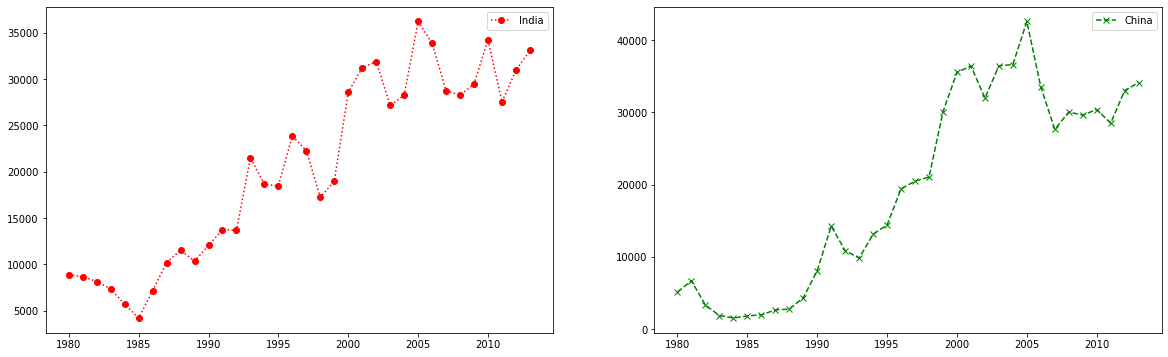

In [38]:
df.loc[['India','China'], years].T.plot(
    kind = 'line',
    figsize=(20,6),
    subplots=True,
    layout=(1,2),
    style=['r:o','g--x'])
plt.show()

In [39]:
df['total']= df[years].sum(axis=1)

In [40]:
df.sort_values(by='total', ascending=False, inplace=True)

In [41]:
df.head(10)

,Continent,Region,CountryStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<AxesSubplot:>

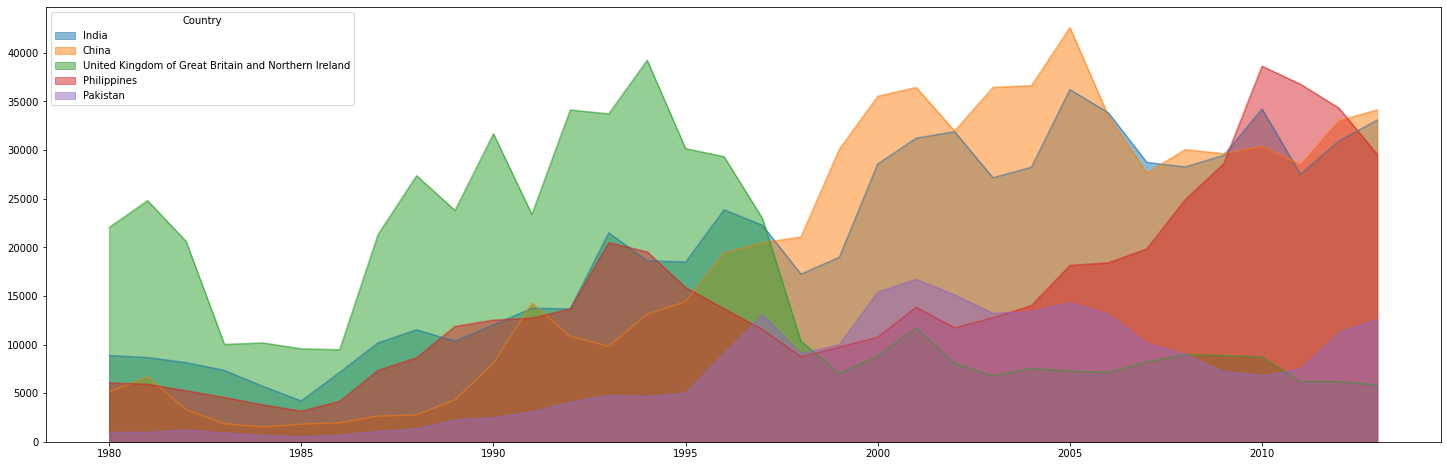

In [42]:
df.head(5)[years].T.plot(kind='area',figsize=(25,8),stacked=False)

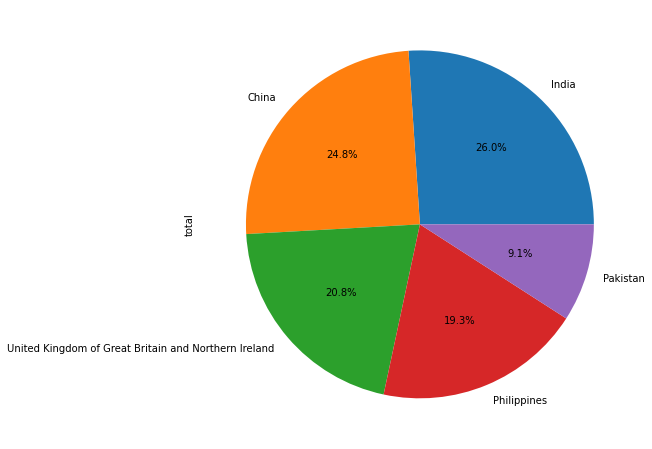

In [43]:
plt.figure(facecolor='white',figsize=(8,8))
df.head(5)['total'].T.plot(kind='pie',subplots=True, autopct='%.1f%%')
plt.show()

In [44]:
result =df.groupby('CountryStatus')['total'].sum()
result

CountryStatus
Developed regions     1714011
Developing regions    4695142
Name: total, dtype: int64

<AxesSubplot:ylabel='total'>

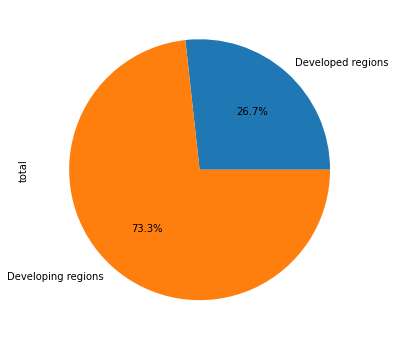

In [45]:
plt.figure(figsize=(6,6),facecolor='white')
result.plot(kind='pie', autopct='%.1f%%')

### list to continents in orders of number of immigration of last 2000-2013

In [46]:
years2 = list(map(str, range(2000,2014))) # list of years
print(years2)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [47]:
Continentnames = ['Asia','Australia','Europe','Africa','North America','South America','Antarctica']

<AxesSubplot:xlabel='1990', ylabel='2000'>

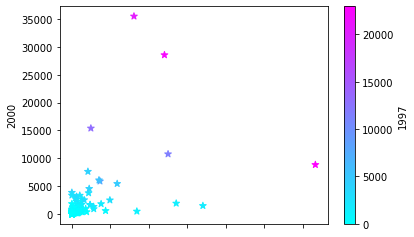

In [48]:
# scatter
df.plot(kind='scatter', x='1990', y='2000',marker='*',s=50, c=20, cmap='cool')

## generating maps and showing visualization

In [49]:
import folium

In [50]:
map = folium.Map()  # defined a world map
map  # display

In [51]:
lucknow_map = folium.Map([26.8567,80.9642], zoom_start=12)
lucknow_map

In [52]:
map = folium.Map(tiles='Stamen Terrain')
map

In [53]:
map = folium.Map(tiles='Stamen Toner')
map

### choropleth maps

In [67]:
geo_data = 'world_countries.json'
cols = [df.index,'total']
key = 'feature.properties.name'
map = folium.Map()
map.choropleth(
    geo_data = geo_data,
    data = df,
    columns = cols,
    key_on = key,
    fill_color = 'YlOrRd',
    fill_opacity =.7,
    line_opacity =.3,
    legend_name = 'Immigration to CANADA from 1980-2013'    
)

map

c:\Users\Dell\miniconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
